In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('HR_train.csv')
test=pd.read_csv('HR_test.csv')
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [5]:
train.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [6]:
test.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
dtype: bool

In [7]:
(train['education']).unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

# EDA

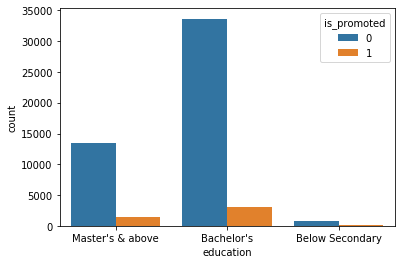

In [8]:
sns.countplot(train['education'],hue=train['is_promoted'])

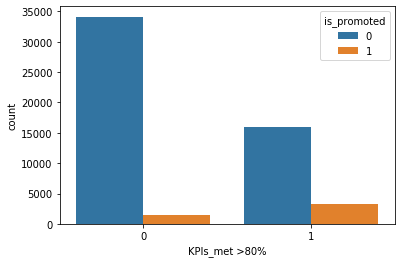

In [9]:
sns.countplot(train['KPIs_met >80%'],hue=train['is_promoted'])

In [10]:
att=train.select_dtypes(include=[np.number])

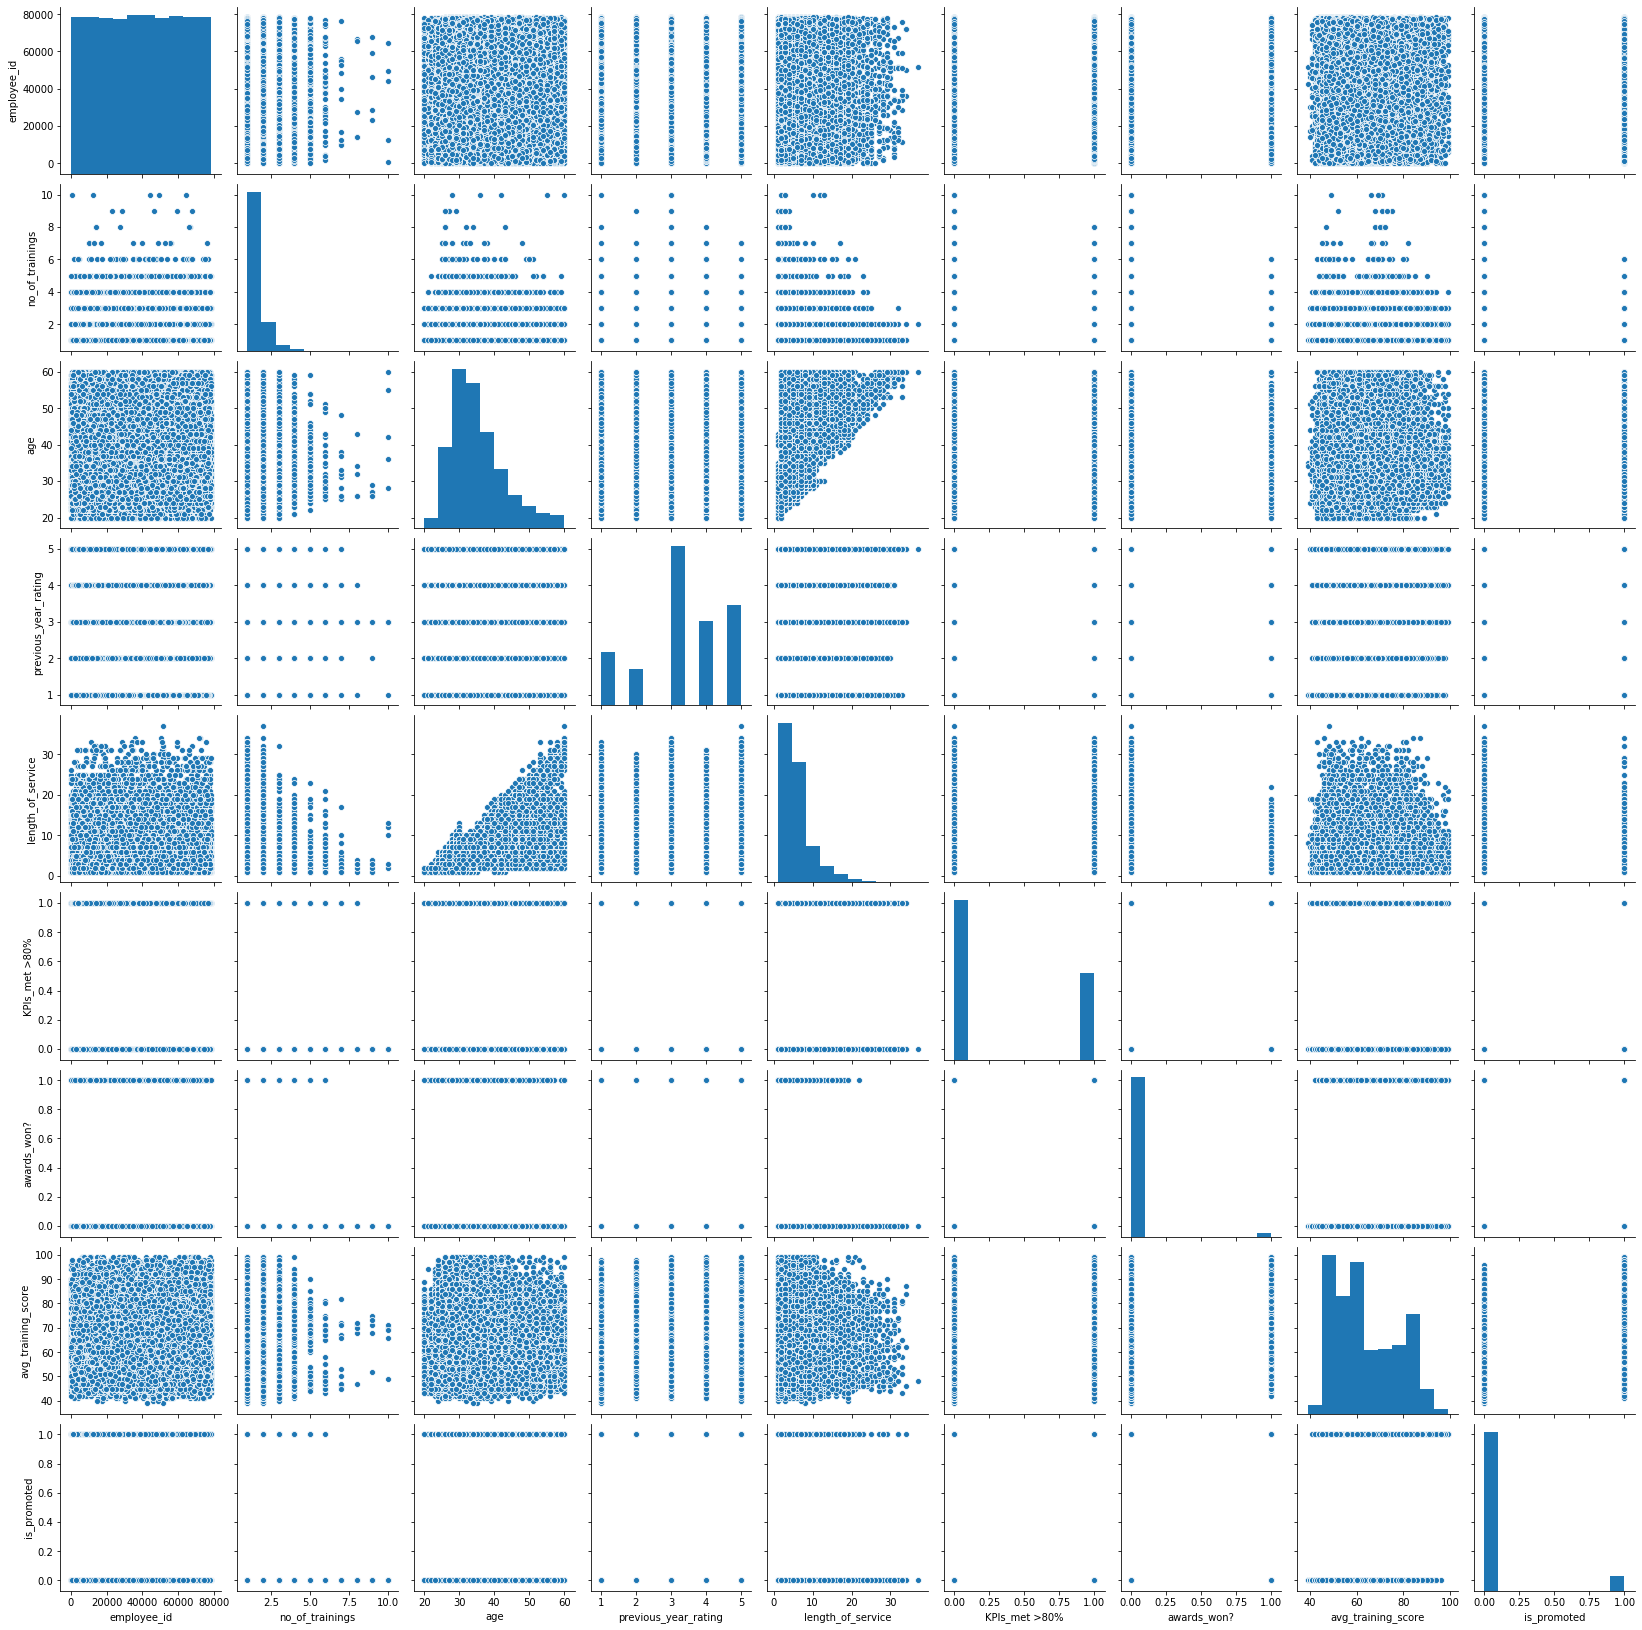

In [11]:
sns.pairplot(att)

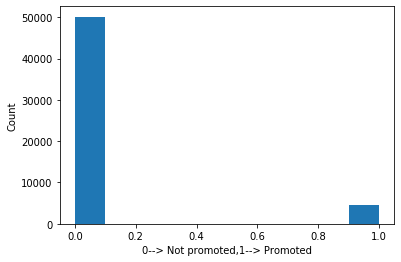

In [12]:
#no of promoted

plt.hist(train['is_promoted'])
plt.xlabel('0--> Not promoted,1--> Promoted')
plt.ylabel('Count')
plt.show()


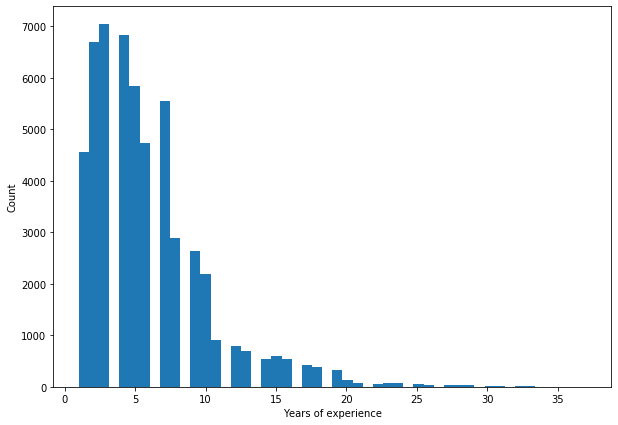

In [13]:
plt.figure(figsize=(10,7))
plt.hist(train['length_of_service'],bins=50)
plt.xlabel('Years of experience')
plt.ylabel('Count')
plt.show()

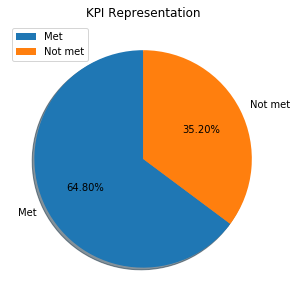

In [14]:
size=train['KPIs_met >80%'].value_counts()
labels=['Met','Not met']
explode=None
plt.rcParams['figure.figsize']=(5,5)
plt.pie(size,labels=labels,explode=explode,startangle=90,radius=1,autopct = "%.2f%%",shadow=True)
plt.title('KPI Representation')
plt.legend()
plt.show()

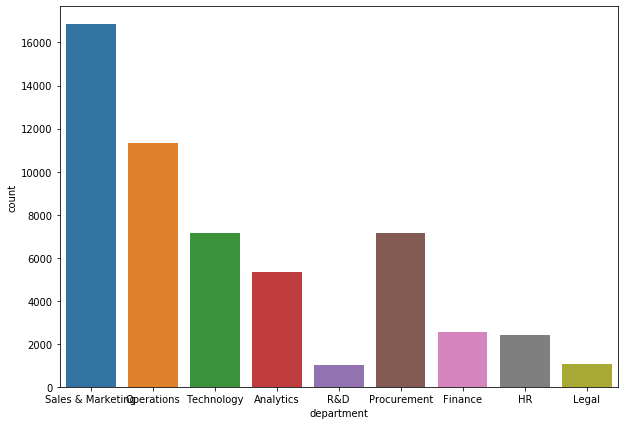

In [15]:
#train.columns
plt.figure(figsize=(10,7))
sns.countplot(train['department'])

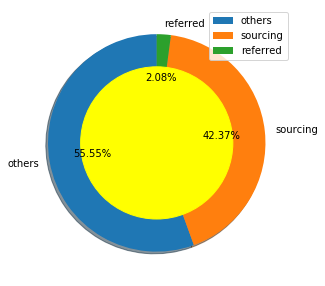

In [16]:
size=train['recruitment_channel'].value_counts()
labels=['others','sourcing','referred']
explode=None

circ=plt.Circle((0,0),0.7,color='yellow')
plt.rcParams['figure.figsize']=(10,5)
plt.pie(size, labels = labels,explode=explode,startangle=90, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circ)
plt.legend()
plt.show()

# Imputing the missing values

In [17]:
train['education'].fillna(train['education'].mode()[0],inplace=True)

In [18]:
train['previous_year_rating'].fillna(1,inplace=True)

In [19]:
test['education'].fillna(test['education'].mode()[0],inplace=True)
test['previous_year_rating'].fillna(1,inplace=True)

In [20]:
train=train.set_index('employee_id')

In [21]:
test=test.set_index('employee_id')

In [22]:
#encoding variables
X=train.iloc[:,:-1]
Y=train['is_promoted']

In [23]:
X=pd.get_dummies(X)

In [24]:
X_test=test
X_test=pd.get_dummies(X_test)

In [25]:
#from sklearn.model_selection import train_test_split


In [26]:
#X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y,test_size=0.2,random_state=42)

In [27]:
##print('Shape Y_train: ',Y_train.shape)
#print('Shape X_Valid: ',X_valid.shape)
#print('Shape Y_valid: ',Y_valid.shape)

In [28]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()

In [29]:
#X_train=sc.fit_transform(X_train)
#X_test=sc.fit_transform(X_test)

In [30]:
#X_valid=sc.fit_transform(X_valid)

In [31]:
#from xgboost import XGBClassifier
#clf=XGBClassifier()
#from sklearn.metrics import confusion_matrix,accuracy_score
#from sklearn.metrics import classification_report
#from sklearn.metrics import average_precision_score

In [32]:
#clf.fit(X_train,Y_train)

In [33]:
#xgb_pred=clf.predict(X_test)

In [34]:


#from xgboost.sklearn import XGBClassifier
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report
#from sklearn.metrics import average_precision_score

#xgb = XGBClassifier()
#xgb.fit(X_train, Y_train)

#xgb_pred = xgb.predict(X_test)

#print("Training Accuracy :", xgb.score(X_train, Y_train))

In [35]:
#from catboost import CatBoostClassifier
#clf_CB=CatBoostClassifier(learning_rate = 0.004, early_stopping_rounds = 100)

In [36]:
#clf_CB.fit(X_train,Y_train)

In [37]:
#clf_CB_pred=clf_CB.predict(X_test)

In [38]:
#print("Training Accuracy :", clf_CB.score(X_train, Y_train))

In [39]:
#boosted_predictions = clf_CB_pred*0.2 + xgb_pred*0.2

In [40]:
#submission=pd.DataFrame({'employee_id':test.index,'is_promoted':boosted_predictions})

In [41]:
#submission.set_index('employee_id')

In [42]:
#submission.to_csv('Submission_hr.csv')

In [43]:
#xgb_=XGBClassifier()


In [44]:
#xgb_.fit(X,Y)



In [45]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [46]:
xgb.fit(X,Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [47]:
pred_1=xgb.predict(X_test)

In [55]:
submission1=pd.DataFrame({'employee_id':test.index,'is_promoted':pred_1})
submission1.set_index('employee_id',inplace=True)

In [56]:
submission1.to_csv('submission1.csv')

In [58]:
train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0


In [59]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()

In [60]:
lor.fit(X,Y)


C:\Users\rohith\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
pred2=lor.predict(X_test)

In [63]:
submission2=pd.DataFrame({'employee_id':test.index,'is_promoted':pred2})
submission2.set_index('employee_id',inplace=True)
submission2.to_csv('submission2.csv')